# 라이브러리 및 데이터 불러오기, 데이터 분리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./data/preprocessed_penguins.csv")

In [3]:
X = df.drop("body_mass_g", axis = 1)
y = df["body_mass_g"]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234)

In [4]:
x_test

,Adelie,Chinstrap,Gentoo,island_Biscoe,island_Dream,island_Torgersen,is_male,culmen_length_mm,culmen_depth_mm,flipper_length_mm
64,1,0,0,1,0,0,1,41.6,18.0,192.0
310,0,0,1,1,0,0,1,52.2,17.1,228.0
263,0,0,1,1,0,0,1,50.5,15.9,222.0
97,1,0,0,0,1,0,0,33.1,16.1,178.0
37,1,0,0,0,1,0,0,37.6,19.3,181.0
...,...,...,...,...,...,...,...,...,...,...
341,0,0,1,1,0,0,1,49.9,16.1,213.0
326,0,0,1,1,0,0,1,53.4,15.8,219.0
295,0,0,1,1,0,0,0,47.5,14.2,209.0
40,1,0,0,0,1,0,1,40.8,18.4,195.0


# 컬럼 별 상관관계 확인

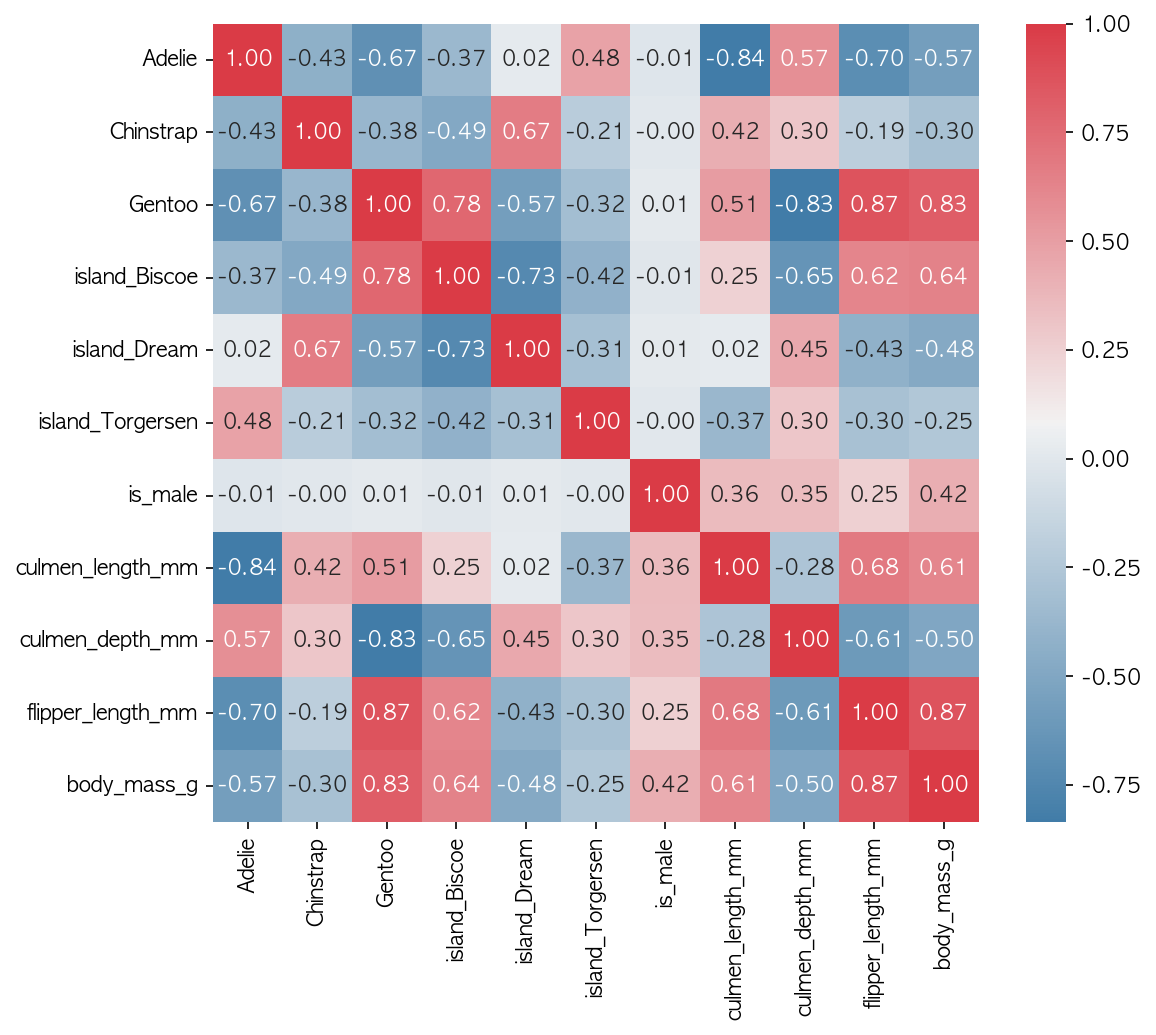

In [5]:
x_train["body_mass_g"] = y_train

cmap = sns.diverging_palette(240, 10, n=9, as_cmap = True)
plt.figure(figsize = (8, 7))
sns.heatmap(
    x_train.corr(),
    annot = True,
    fmt = ".2f",
    cmap = cmap
)
plt.tight_layout()

# 다중 선형 회귀

## Train 셋으로 확인

In [6]:
def train_multiple_linear_regression(X, y):
    x_constant = sm.add_constant(X, has_constant = "add")
    model = sm.OLS(y, x_constant)
    results = model.fit()
    return results

In [7]:
# 전진선택법으로 하나하나 선택해서 정확도를 올림

selected_x_train = x_train[["Gentoo", "culmen_length_mm",
                            "flipper_length_mm", "Adelie", "culmen_depth_mm",
                            "is_male"]]
train_results = train_multiple_linear_regression(selected_x_train, y_train)

In [8]:
train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     305.4
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          3.43e-116
Time:                        16:52:43   Log-Likelihood:                -1933.7
No. Observations:                 273   AIC:                             3881.
Df Residuals:                     266   BIC:                             3907.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1321.5278    676.012     -1.955      0.052   -2652.544       9.488
Gentoo             1281.3323    123.995     10.334      0.000    1037.195    1525.469
culmen_length_mm     20.9023      8.316      2.514      0.013       4.529      37.275
flipper_length_mm    13.9713      3.347      4.175      0.000       7.382      20.560
Adelie              254.0242     91.768      2.768      0.006      73.340     434.709
culmen_depth_mm      59.6303     21.949      2.717      0.007      16.415     102.845
is_male             404.2295     53.496      7.556      0.000     298.899     509.560
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.183
Skew:                           0.060   Prob(JB):                        0.913
Kurtosis:                       3.039   Cond. No.                     7.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF를 이용해 다중공선성 진단

In [9]:
def check_multi_colinearity(X):
    vif = pd.DataFrame()
    vif["features"] = selected_x_train.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(len(selected_x_train.columns))]
    return vif.sort_values(by = "VIF", ascending = False)

In [10]:
check_multi_colinearity(selected_x_train)

,features,VIF
2,flipper_length_mm,748.661112
4,culmen_depth_mm,407.274820
1,culmen_length_mm,406.391231
0,Gentoo,17.843157
3,Adelie,9.933716
5,is_male,2.767891


In [11]:
selected_x_train = selected_x_train.drop("flipper_length_mm", axis = 1)
selected_x_train = selected_x_train.drop("culmen_depth_mm", axis = 1)

In [12]:
check_multi_colinearity(selected_x_train)

,features,VIF
1,culmen_length_mm,5.415357
0,Gentoo,2.815787
2,Adelie,2.399719
3,is_male,2.130023


In [13]:
train_results = train_multiple_linear_regression(selected_x_train, y_train)

In [14]:
train_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     408.3
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          1.12e-112
Time:                        16:52:43   Log-Likelihood:                -1948.2
No. Observations:                 273   AIC:                             3906.
Df Residuals:                     268   BIC:                             3924.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1744.5412    389.668      4.477      0.000     977.342    2511.740
Gentoo            1395.3550     52.740     26.457      0.000    1291.518    1499.192
culmen_length_mm    35.2561      8.283      4.256      0.000      18.948      51.564
Adelie             318.9079     94.894      3.361      0.001     132.076     505.740
is_male            532.4198     48.246     11.036      0.000     437.431     627.409
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.218
Skew:                          -0.059   Prob(JB):                        0.897
Kurtosis:                       2.929   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
train_y_pred = train_results.predict(sm.add_constant(selected_x_train))

print("RMSE : ", np.sqrt(mean_squared_error(y_train, train_y_pred)))

RMSE :  304.0924327086978


## Test 셋으로 확인해보기

In [16]:
columns = ["culmen_length_mm", "Adelie", "Gentoo", "is_male"]
cur_x_test = x_test[columns]
test_results = train_multiple_linear_regression(cur_x_test, y_test)

In [17]:
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     77.00
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           9.56e-24
Time:                        16:52:43   Log-Likelihood:                -495.02
No. Observations:                  69   AIC:                             1000.
Df Residuals:                      64   BIC:                             1011.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2119.7304    786.848      2.694      0.009     547.820    3691.641
culmen_length_mm    27.1878     16.295      1.668      0.100      -5.366      59.742
Adelie             266.0565    208.566      1.276      0.207    -150.602     682.715
Gentoo            1332.8777    116.855     11.406      0.000    1099.433    1566.322
is_male            589.0151     98.876      5.957      0.000     391.488     786.542
==============================================================================
Omnibus:                        0.405   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.561
Skew:                           0.031   Prob(JB):                        0.755
Kurtosis:                       2.563   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# RMSE 확인
test_y_pred = test_results.predict(sm.add_constant(cur_x_test))

print("RMSE : ", np.sqrt(mean_squared_error(y_test, test_y_pred)))

RMSE :  315.862587280225


## 다 합쳐서 확인해보기

In [19]:
columns = ["culmen_length_mm", "Adelie", "Gentoo", "is_male"]
X = X[columns]

results = train_multiple_linear_regression(X, y)

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     489.0
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          6.80e-139
Time:                        16:52:43   Log-Likelihood:                -2443.8
No. Observations:                 342   AIC:                             4898.
Df Residuals:                     337   BIC:                             4917.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1835.4053    345.218      5.317      0.000    1156.352    2514.458
culmen_length_mm    33.2754      7.296      4.561      0.000      18.924      47.626
Adelie             307.1586     85.841      3.578      0.000     138.307     476.010
Gentoo            1384.9321     47.750     29.004      0.000    1291.006    1478.858
is_male            545.4316     43.003     12.683      0.000     460.843     630.020
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.333
Skew:                          -0.023   Prob(JB):                        0.847
Kurtosis:                       2.854   Cond. No.                         940.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
multiple_y_pred = results.predict(sm.add_constant(X))

print("r2 score :", results.rsquared)
print("RMSE : ", np.sqrt(mean_squared_error(y, multiple_y_pred)))
print("coefficient abs sum", np.abs(results.params).sum())

r2 score : 0.8530425417579207
RMSE :  306.97973044971144
coefficient abs sum 4106.202986867365


# Ridge

In [23]:
L2_model = Ridge()
L2_model.fit(X, y)
L2_y_pred = L2_model.predict(X)
print("r2 score", r2_score(y, L2_y_pred))
print("RMSE score", np.sqrt(mean_squared_error(y, L2_y_pred)))
print("coefficient abs sum", np.abs(L2_model.coef_).sum())

r2 score 0.8527663072953775
RMSE score 307.268108360595
coefficient abs sum 2192.108935703269


# Lasso

In [24]:
L1_model = Lasso()
L1_model.fit(X, y)
L1_y_pred = L1_model.predict(X)
print("r2 score", r2_score(y, L1_y_pred))
print("RMSE score", np.sqrt(mean_squared_error(y, L1_y_pred)))
print("coefficient abs sum", np.abs(L1_model.coef_).sum())

r2 score 0.8529746814931998
RMSE score 307.05059899126064
coefficient abs sum 2227.321563991102


# 다중 선형 회귀 & Ridge & Lasso 비교해보기

In [28]:
models = ["multiple linear regression", "ridge", "lasso"]

for model in models:
    if model == "multiple linear regression":
        print(model)
        print("r2 score :", results.rsquared)
        print("RMSE : ", np.sqrt(mean_squared_error(y, multiple_y_pred)))
        print("coefficient abs sum", np.abs(results.params).sum())
        print("")
    elif model == "ridge":
        print(model)
        print("r2 score", r2_score(y, L2_y_pred))
        print("RMSE score", np.sqrt(mean_squared_error(y, L2_y_pred)))
        print("coefficient abs sum", np.abs(L2_model.coef_).sum())
        print("")
    else:
        print(model)
        print("r2 score", r2_score(y, L1_y_pred))
        print("RMSE score", np.sqrt(mean_squared_error(y, L1_y_pred)))
        print("coefficient abs sum", np.abs(L1_model.coef_).sum())
        print("")

multiple linear regression
r2 score : 0.8530425417579207
RMSE :  306.97973044971144
coefficient abs sum 4106.202986867365

ridge
r2 score 0.8527663072953775
RMSE score 307.268108360595
coefficient abs sum 2192.108935703269

lasso
r2 score 0.8529746814931998
RMSE score 307.05059899126064
coefficient abs sum 2227.321563991102

